In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For pretty plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Load the CSV files
train = pd.read_csv("/content/drive/MyDrive/train.csv")
test = pd.read_csv("/content/drive/MyDrive/test.csv")
gender = pd.read_csv("/content/drive/MyDrive/gender_submission.csv")

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
print("Shape of train:", train.shape)
print("Shape of test:", test.shape)

print("\nColumns in train:")
print(train.columns)

print("\nInfo:")
train.info()

print("\nSummary statistics:")
train.describe(include="all")


Shape of train: (891, 13)
Shape of test: (418, 11)

Columns in train:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeBin', 'FamilySize'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
 11  AgeBin       891 non-null    category
 12  FamilySize   891 non-null    int64   
dtype

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeBin,FamilySize
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3,5,NaN
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,S,YoungAdult,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646,535,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN,NaN,1.904602
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN,NaN,1.613459
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,1.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,1.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,1.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,2.000000


In [5]:
train.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
# Fill missing Age with median age
train["Age"].fillna(train["Age"].median(), inplace=True)

# Fill missing Embarked with most frequent value (mode)
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)

# Cabin has many missing values, so we drop it
train.drop(columns=["Cabin"], inplace=True)

# Check again
train.isnull().sum()


/tmp/ipython-input-3431357206.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(train["Age"].median(), inplace=True)
/tmp/ipython-input-3431357206.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
train["Survived"].value_counts()


,count
Survived,
0,549
1,342


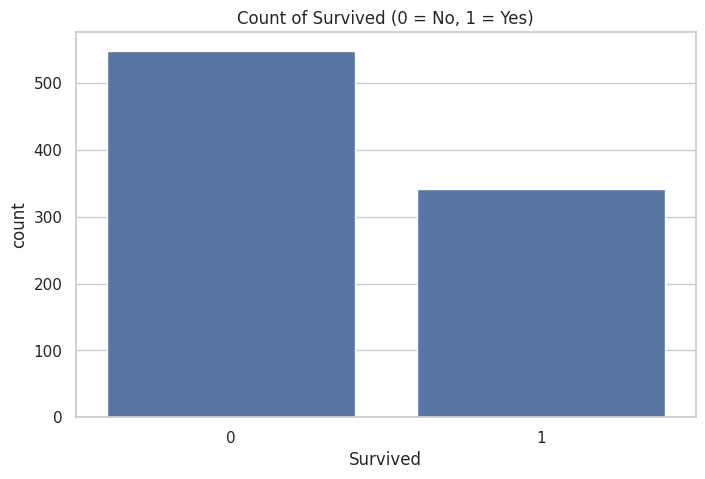

,proportion
Survived,
0,61.616162
1,38.383838


In [9]:
sns.countplot(x="Survived", data=train)
plt.title("Count of Survived (0 = No, 1 = Yes)")
plt.show()

train["Survived"].value_counts(normalize=True) * 100


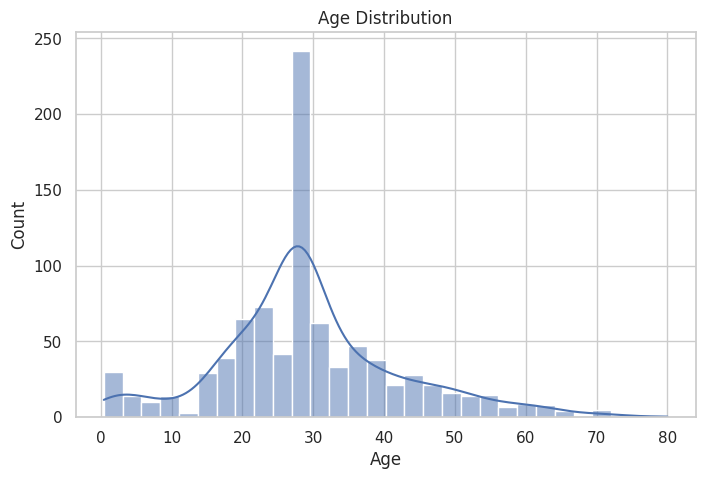

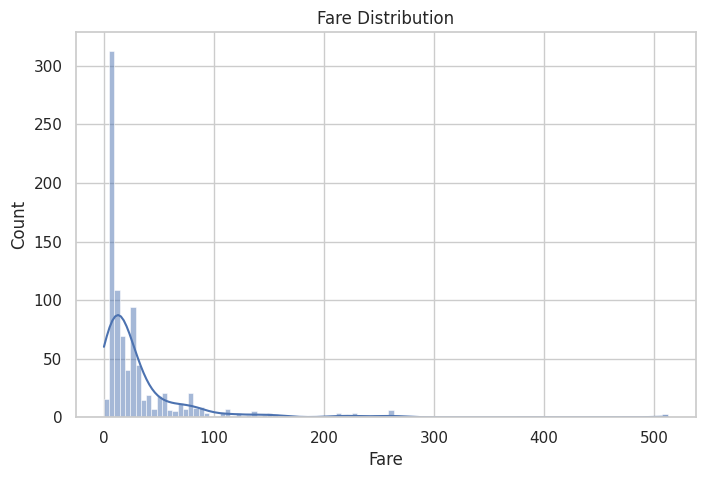

In [10]:
fig, ax = plt.subplots()
sns.histplot(train["Age"], kde=True, ax=ax)
ax.set_title("Age Distribution")
plt.show()

fig, ax = plt.subplots()
sns.histplot(train["Fare"], kde=True, ax=ax)
ax.set_title("Fare Distribution")
plt.show()


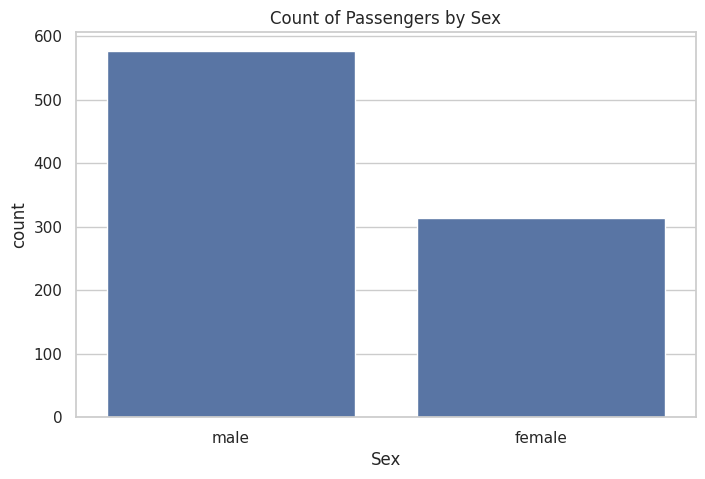

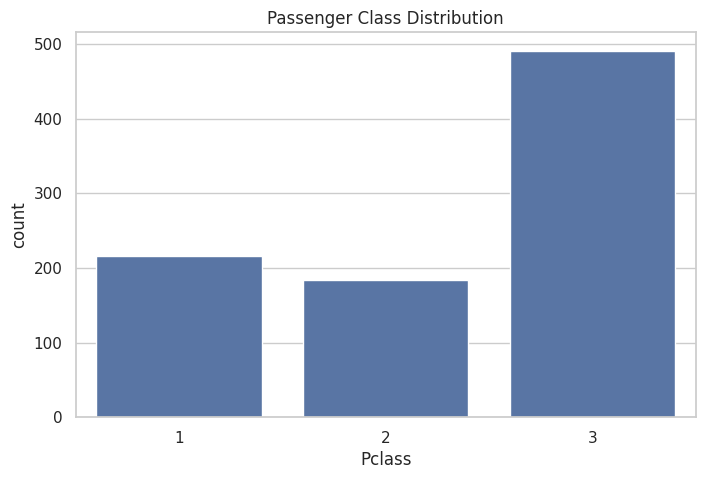

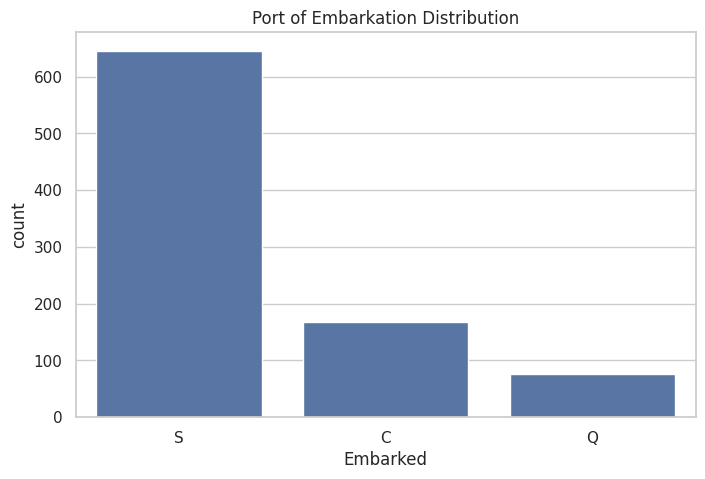

In [11]:
fig, ax = plt.subplots()
sns.countplot(x="Sex", data=train, ax=ax)
ax.set_title("Count of Passengers by Sex")
plt.show()

fig, ax = plt.subplots()
sns.countplot(x="Pclass", data=train, ax=ax)
ax.set_title("Passenger Class Distribution")
plt.show()

fig, ax = plt.subplots()
sns.countplot(x="Embarked", data=train, ax=ax)
ax.set_title("Port of Embarkation Distribution")
plt.show()


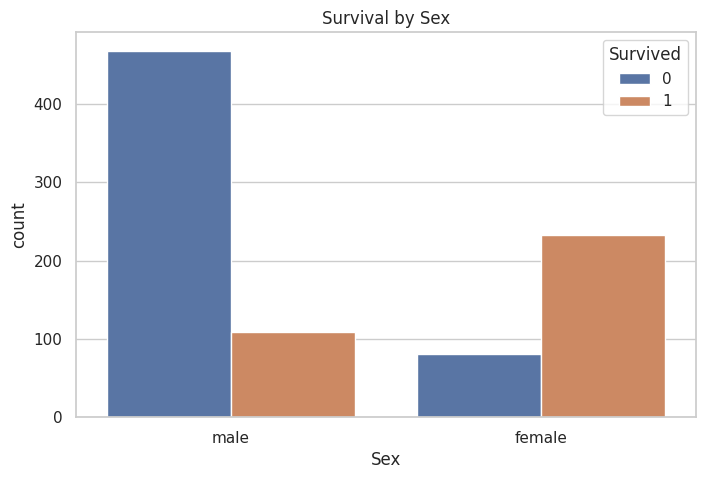

,Survived
Sex,
female,0.742038
male,0.188908


In [12]:
sns.countplot(x="Sex", hue="Survived", data=train)
plt.title("Survival by Sex")
plt.show()

train.groupby("Sex")["Survived"].mean()


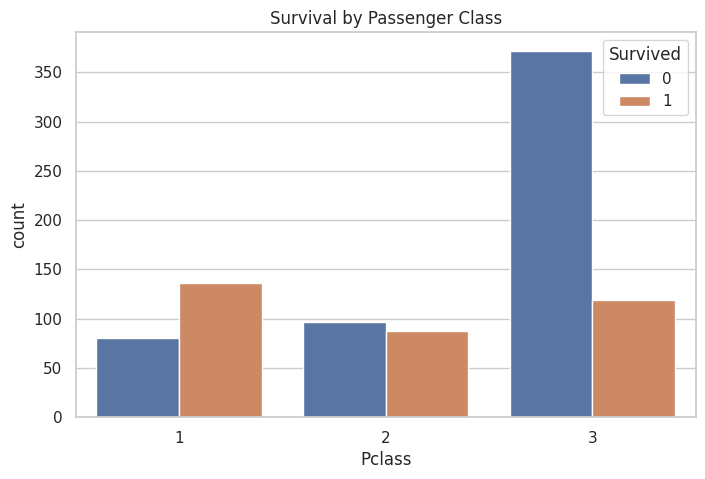

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [13]:
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.title("Survival by Passenger Class")
plt.show()

train.groupby("Pclass")["Survived"].mean()


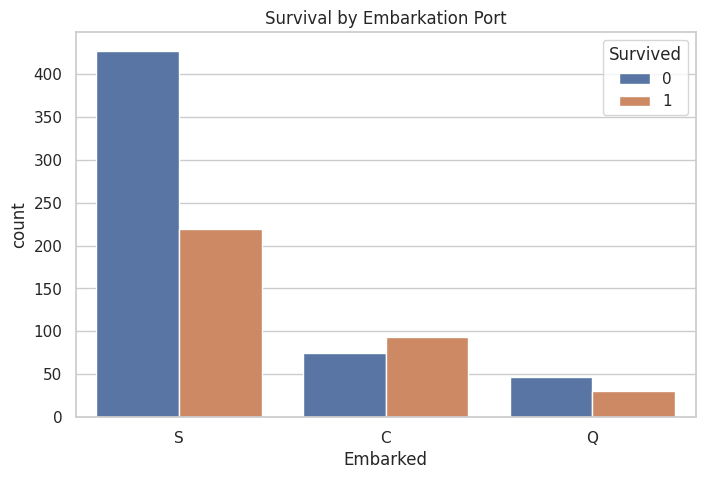

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [14]:
sns.countplot(x="Embarked", hue="Survived", data=train)
plt.title("Survival by Embarkation Port")
plt.show()

train.groupby("Embarked")["Survived"].mean()


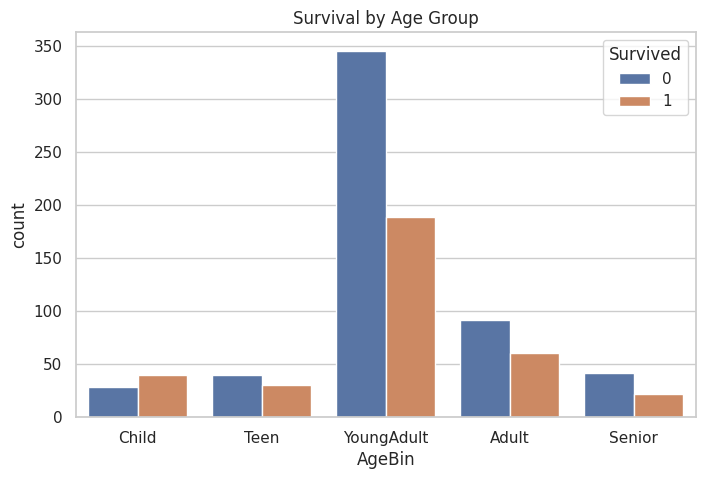

/tmp/ipython-input-3872157535.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby("AgeBin")["Survived"].mean()


,Survived
AgeBin,
Child,0.579710
Teen,0.428571
YoungAdult,0.353271
Adult,0.398693
Senior,0.343750


In [15]:
# Create age bins
train["AgeBin"] = pd.cut(train["Age"], bins=[0, 12, 18, 35, 50, 80],
                         labels=["Child", "Teen", "YoungAdult", "Adult", "Senior"])

sns.countplot(x="AgeBin", hue="Survived", data=train)
plt.title("Survival by Age Group")
plt.show()

train.groupby("AgeBin")["Survived"].mean()


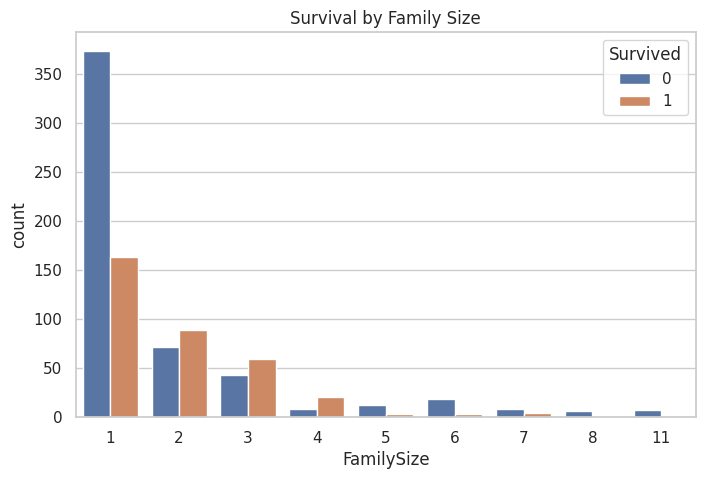

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [16]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

sns.countplot(x="FamilySize", hue="Survived", data=train)
plt.title("Survival by Family Size")
plt.show()

train.groupby("FamilySize")["Survived"].mean()


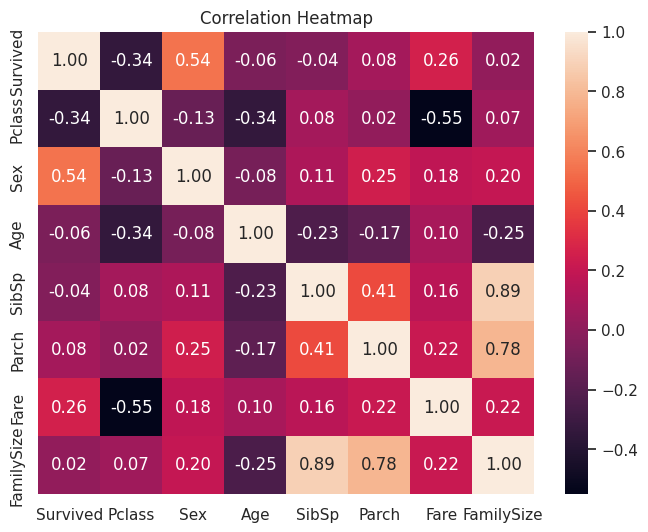

In [17]:
# Make a copy with numeric encoding
df_corr = train.copy()

# Encode Sex: male = 0, female = 1
df_corr["Sex"] = df_corr["Sex"].map({"male": 0, "female": 1})

# Encode Embarked
df_corr["Embarked"] = df_corr["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Select numeric columns
numeric_cols = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "FamilySize"]
corr = df_corr[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
